In [101]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [102]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.mnist.load_data()

In [103]:
print(x_train_full.shape)
print(y_train_full.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [104]:
x_train_full[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [105]:
from sklearn.preprocessing import Normalizer, StandardScaler

x_train_full = x_train_full / 255.0
x_test = x_test / 255.0

In [106]:
x_train_full[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Text(0.5, 1.0, '5')

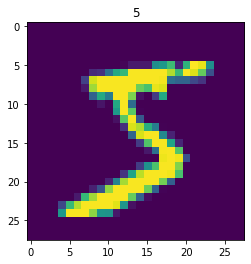

In [107]:
plt.imshow(x_train_full[0])
plt.title(y_train_full[0])

In [108]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[28, 28]))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [109]:
model.summary()

Model: "sequential_245"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_64 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_653 (Dense)            (None, 300)               235500    
_________________________________________________________________
dense_654 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_655 (Dense)            (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [110]:
optim = keras.optimizers.SGD(learning_rate=0.001)

In [111]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=optim, metrics=["accuracy"])

In [112]:
check = keras.callbacks.ModelCheckpoint('digit.h5', save_best_only=True)
early = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [115]:
history = model.fit(x_train_full, y_train_full, epochs=30, validation_split=0.2, callbacks=[check, early])

Epoch 1/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1481 - accuracy: 0.9587 - val_loss: 0.1555 - val_accuracy: 0.9578
Epoch 2/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1465 - accuracy: 0.9587 - val_loss: 0.1544 - val_accuracy: 0.9581
Epoch 3/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1449 - accuracy: 0.9595 - val_loss: 0.1537 - val_accuracy: 0.9583
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1434 - accuracy: 0.9599 - val_loss: 0.1519 - val_accuracy: 0.9588
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1419 - accuracy: 0.9600 - val_loss: 0.1508 - val_accuracy: 0.9591
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1404 - accuracy: 0.9606 - val_loss: 0.1502 - val_accuracy: 0.9585
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1389 - accuracy: 0.9614 - val_loss: 0.1488 - val_accuracy:

<AxesSubplot:>

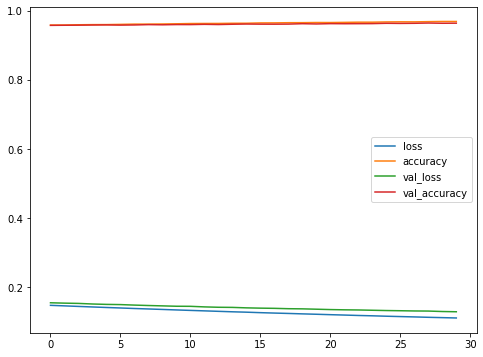

In [120]:
pd.DataFrame(history.history).plot(figsize=(8, 6))

In [121]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 944us/step - loss: 0.1245 - accuracy: 0.9639


[0.1245386078953743, 0.9639000296592712]

In [122]:
def build_model(n_hidden=1, n_neurons=30, lr=3e-3):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=[28, 28]))
    model.add(keras.layers.Flatten())
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(10, activation='softmax'))
    optimizer = keras.optimizers.SGD(learning_rate=lr)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
    return model

In [123]:
clf = keras.wrappers.scikit_learn.KerasClassifier(build_model)

In [124]:
param_distribs = {
    "n_hidden": [1, 2],
    "n_neurons": [100, 200],
    "lr": [0.1, 0.01]
}

rnd_search_cv = RandomizedSearchCV(clf, param_distribs, n_iter=5, cv=3)
rnd_search_cv.fit(x_train_full, y_train_full, epochs=50, validation_split=0.2, callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/50
1000/1000 [==============================] - 1s 942us/step - loss: 0.8390 - accuracy: 0.8012 - val_loss: 0.4125 - val_accuracy: 0.8964
Epoch 2/50
1000/1000 [==============================] - 1s 862us/step - loss: 0.4029 - accuracy: 0.8929 - val_loss: 0.3228 - val_accuracy: 0.9103
Epoch 3/50
1000/1000 [==============================] - 1s 910us/step - loss: 0.3397 - accuracy: 0.9069 - val_loss: 0.2871 - val_accuracy: 0.9205
Epoch 4/50
1000/1000 [==============================] - 1s 913us/step - loss: 0.3064 - accuracy: 0.9149 - val_loss: 0.2644 - val_accuracy: 0.9256
Epoch 5/50
1000/1000 [==============================] - 1s 819us/step - loss: 0.2828 - accuracy: 0.9211 - val_loss: 0.2472 - val_accuracy: 0.9304
Epoch 6/50
1000/1000 [==============================] - 1s 841us/step - loss: 0.2642 - accuracy: 0.9265 - val_loss: 0.2345 - val_accuracy: 0.9336
Epoch 7/50
1000/1000 [==============================] - 1s 853us/step - loss: 0.2488 - accuracy: 0.9309 - val_loss: 0.2223 -

Epoch 7/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2496 - accuracy: 0.9303 - val_loss: 0.2269 - val_accuracy: 0.9355
Epoch 8/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2357 - accuracy: 0.9342 - val_loss: 0.2167 - val_accuracy: 0.9386
Epoch 9/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2236 - accuracy: 0.9373 - val_loss: 0.2068 - val_accuracy: 0.9411
Epoch 10/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2126 - accuracy: 0.9401 - val_loss: 0.1986 - val_accuracy: 0.9438
Epoch 11/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2025 - accuracy: 0.9438 - val_loss: 0.1925 - val_accuracy: 0.9457
Epoch 12/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1934 - accuracy: 0.9456 - val_loss: 0.1841 - val_accuracy: 0.9498
Epoch 13/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1849 - accuracy: 0.9484 - val_loss: 0.1783 - val_accur

Epoch 13/50
1000/1000 [==============================] - 1s 998us/step - loss: 0.1865 - accuracy: 0.9477 - val_loss: 0.2038 - val_accuracy: 0.9417
Epoch 14/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1789 - accuracy: 0.9499 - val_loss: 0.1975 - val_accuracy: 0.9435
Epoch 15/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1716 - accuracy: 0.9520 - val_loss: 0.1915 - val_accuracy: 0.9454
Epoch 16/50
1000/1000 [==============================] - 1s 987us/step - loss: 0.1648 - accuracy: 0.9538 - val_loss: 0.1885 - val_accuracy: 0.9467
Epoch 17/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1586 - accuracy: 0.9559 - val_loss: 0.1818 - val_accuracy: 0.9479
Epoch 18/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1530 - accuracy: 0.9571 - val_loss: 0.1762 - val_accuracy: 0.9494
Epoch 19/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1476 - accuracy: 0.9590 - val_loss: 0.1728 - va

Epoch 19/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1084 - accuracy: 0.9704 - val_loss: 0.1287 - val_accuracy: 0.9645
Epoch 20/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1035 - accuracy: 0.9712 - val_loss: 0.1215 - val_accuracy: 0.9672
Epoch 21/50
1000/1000 [==============================] - 1s 981us/step - loss: 0.0988 - accuracy: 0.9730 - val_loss: 0.1218 - val_accuracy: 0.9653
Epoch 22/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0942 - accuracy: 0.9740 - val_loss: 0.1199 - val_accuracy: 0.9660
Epoch 23/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0898 - accuracy: 0.9753 - val_loss: 0.1161 - val_accuracy: 0.9682
Epoch 24/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0855 - accuracy: 0.9770 - val_loss: 0.1131 - val_accuracy: 0.9686
Epoch 25/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0821 - accuracy: 0.9779 - val_loss: 0.1141 - val_

Epoch 25/50
1000/1000 [==============================] - 1s 987us/step - loss: 0.0764 - accuracy: 0.9786 - val_loss: 0.1154 - val_accuracy: 0.9688
Epoch 26/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0728 - accuracy: 0.9802 - val_loss: 0.1151 - val_accuracy: 0.9680
Epoch 27/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0696 - accuracy: 0.9812 - val_loss: 0.1144 - val_accuracy: 0.9685
Epoch 28/50
1000/1000 [==============================] - 1s 985us/step - loss: 0.0667 - accuracy: 0.9824 - val_loss: 0.1140 - val_accuracy: 0.9678
Epoch 29/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0636 - accuracy: 0.9832 - val_loss: 0.1102 - val_accuracy: 0.9701
Epoch 30/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0607 - accuracy: 0.9842 - val_loss: 0.1109 - val_accuracy: 0.9691
Epoch 31/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0583 - accuracy: 0.9843 - val_loss: 0.1091 - va

Epoch 31/50
1000/1000 [==============================] - 1s 972us/step - loss: 0.0559 - accuracy: 0.9865 - val_loss: 0.1176 - val_accuracy: 0.9643
Epoch 32/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0537 - accuracy: 0.9864 - val_loss: 0.1200 - val_accuracy: 0.9643
Epoch 33/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0518 - accuracy: 0.9873 - val_loss: 0.1167 - val_accuracy: 0.9657
Epoch 34/50
1000/1000 [==============================] - 1s 990us/step - loss: 0.0498 - accuracy: 0.9874 - val_loss: 0.1168 - val_accuracy: 0.9657
Epoch 35/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0476 - accuracy: 0.9883 - val_loss: 0.1165 - val_accuracy: 0.9657
Epoch 36/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0458 - accuracy: 0.9891 - val_loss: 0.1135 - val_accuracy: 0.9671
Epoch 37/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0439 - accuracy: 0.9896 - val_loss: 0.1294 - va

Epoch 3/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1008 - accuracy: 0.9690 - val_loss: 0.1157 - val_accuracy: 0.9640
Epoch 4/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0726 - accuracy: 0.9778 - val_loss: 0.1165 - val_accuracy: 0.9646
Epoch 5/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0532 - accuracy: 0.9838 - val_loss: 0.1089 - val_accuracy: 0.9665
Epoch 6/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0391 - accuracy: 0.9887 - val_loss: 0.0949 - val_accuracy: 0.9705
Epoch 7/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0297 - accuracy: 0.9913 - val_loss: 0.0999 - val_accuracy: 0.9714
Epoch 8/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0218 - accuracy: 0.9940 - val_loss: 0.0978 - val_accuracy: 0.9729
Epoch 9/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0152 - accuracy: 0.9963 - val_loss: 0.0989 - val_accuracy:

1000/1000 [==============================] - 1s 930us/step - loss: 0.1011 - accuracy: 0.9736 - val_loss: 0.1205 - val_accuracy: 0.9669
Epoch 37/50
1000/1000 [==============================] - 1s 912us/step - loss: 0.0989 - accuracy: 0.9739 - val_loss: 0.1196 - val_accuracy: 0.9679
Epoch 38/50
1000/1000 [==============================] - 1s 918us/step - loss: 0.0965 - accuracy: 0.9748 - val_loss: 0.1179 - val_accuracy: 0.9691
Epoch 39/50
1000/1000 [==============================] - 1s 919us/step - loss: 0.0944 - accuracy: 0.9758 - val_loss: 0.1172 - val_accuracy: 0.9693
Epoch 40/50
1000/1000 [==============================] - 1s 912us/step - loss: 0.0921 - accuracy: 0.9757 - val_loss: 0.1150 - val_accuracy: 0.9690
Epoch 41/50
1000/1000 [==============================] - 1s 926us/step - loss: 0.0901 - accuracy: 0.9765 - val_loss: 0.1146 - val_accuracy: 0.9697
Epoch 42/50
1000/1000 [==============================] - 1s 921us/step - loss: 0.0880 - accuracy: 0.9773 - val_loss: 0.1128 - val_

1000/1000 [==============================] - 1s 915us/step - loss: 0.0877 - accuracy: 0.9768 - val_loss: 0.1165 - val_accuracy: 0.9680
Epoch 42/50
1000/1000 [==============================] - 1s 935us/step - loss: 0.0859 - accuracy: 0.9770 - val_loss: 0.1159 - val_accuracy: 0.9693
Epoch 43/50
1000/1000 [==============================] - 1s 937us/step - loss: 0.0839 - accuracy: 0.9773 - val_loss: 0.1142 - val_accuracy: 0.9694
Epoch 44/50
1000/1000 [==============================] - 1s 936us/step - loss: 0.0821 - accuracy: 0.9783 - val_loss: 0.1136 - val_accuracy: 0.9695
Epoch 45/50
1000/1000 [==============================] - 1s 946us/step - loss: 0.0802 - accuracy: 0.9791 - val_loss: 0.1138 - val_accuracy: 0.9697
Epoch 46/50
1000/1000 [==============================] - 1s 939us/step - loss: 0.0786 - accuracy: 0.9794 - val_loss: 0.1116 - val_accuracy: 0.9704
Epoch 47/50
1000/1000 [==============================] - 1s 913us/step - loss: 0.0769 - accuracy: 0.9794 - val_loss: 0.1113 - val_

1000/1000 [==============================] - 1s 922us/step - loss: 0.0801 - accuracy: 0.9788 - val_loss: 0.1354 - val_accuracy: 0.9601
Epoch 47/50
1000/1000 [==============================] - 1s 921us/step - loss: 0.0785 - accuracy: 0.9792 - val_loss: 0.1333 - val_accuracy: 0.9617
Epoch 48/50
1000/1000 [==============================] - 1s 910us/step - loss: 0.0768 - accuracy: 0.9800 - val_loss: 0.1329 - val_accuracy: 0.9630
Epoch 49/50
1000/1000 [==============================] - 1s 894us/step - loss: 0.0754 - accuracy: 0.9804 - val_loss: 0.1302 - val_accuracy: 0.9626
Epoch 50/50
625/625 [==============================] - 0s 581us/step - loss: 0.1282 - accuracy: 0.9638
Epoch 1/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3757 - accuracy: 0.8929 - val_loss: 0.2282 - val_accuracy: 0.9331
Epoch 2/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1957 - accuracy: 0.9438 - val_loss: 0.1488 - val_accuracy: 0.9582
Epoch 3/50
1000/1000 [===========

1000/1000 [==============================] - 1s 1ms/step - loss: 0.1044 - accuracy: 0.9705 - val_loss: 0.1215 - val_accuracy: 0.9643
Epoch 5/50
1000/1000 [==============================] - 1s 994us/step - loss: 0.0831 - accuracy: 0.9768 - val_loss: 0.1090 - val_accuracy: 0.9663
Epoch 6/50
1000/1000 [==============================] - 1s 988us/step - loss: 0.0676 - accuracy: 0.9809 - val_loss: 0.1136 - val_accuracy: 0.9663
Epoch 7/50
1000/1000 [==============================] - 1s 981us/step - loss: 0.0566 - accuracy: 0.9848 - val_loss: 0.1022 - val_accuracy: 0.9674
Epoch 8/50
1000/1000 [==============================] - 1s 983us/step - loss: 0.0478 - accuracy: 0.9872 - val_loss: 0.0952 - val_accuracy: 0.9707
Epoch 9/50
1000/1000 [==============================] - 1s 979us/step - loss: 0.0400 - accuracy: 0.9901 - val_loss: 0.0898 - val_accuracy: 0.9731
Epoch 10/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0346 - accuracy: 0.9920 - val_loss: 0.0915 - val_accuracy:

RandomizedSearchCV(cv=3,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000022A8ED532E0>,
                   n_iter=5,
                   param_distributions={'lr': [0.1, 0.01], 'n_hidden': [1, 2],
                                        'n_neurons': [100, 200]})

In [125]:
rnd_search_cv.best_params_

{'n_neurons': 200, 'n_hidden': 2, 'lr': 0.1}

In [126]:
rnd_search_cv.best_score_

0.9754999876022339

In [127]:
model = rnd_search_cv.best_estimator_

In [128]:
model.score(x_test, y_test)

313/313 [==============================] - 0s 977us/step - loss: 0.0709 - accuracy: 0.9818


0.9818000197410583